<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Intégration</p>

<div style="font-weight:bold; background-color:#61C3CE">
    Evaluation :
    <ul>
        <li>Calculs exacts d'intégrales.</li>
        <li>Utilisation d'une méthode approchée pour calculer
            des intégrales.</li>
    </ul>
</div>

**Recommandations :**

+ Respectez rigoureusement l'interface des fonctions, et les consignes.
+ Copiez-collez le code de votre fonction (ne contenant aucun print ou autre effet de bord)
+ Utilisez les alias définis ci-dessous.
+ Même si vous travaillez à plusieurs, faites un dépôt par personne.

**Objectifs :**

+ Calculer des valeurs exactes d'intégrales
+ Mettre en oeuvre une méthode approchée de calcul d'intégrales
+ Utiliser le calcul intégral pour calculer des probabilités
+ Utiliser la transformée de Fourier pour mettre en oeuvre un filtre

In [1]:
%matplotlib inline

import numpy as np
import numpy.random

import matplotlib.pyplot as plt
from scipy.integrate import quad

import time
import random
import math

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Les paragraphes "pour aller plus loin" sont à traiter en seconde lecture, après avoir fini tous les autres points

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Introduction</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Applications</p>

+ Usage 1 : Analyse de données (calcul de probabilités)
+ Usage 2 : Traitement du signal (transformée de Fourier)

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Points de vues</p>

+ Analytiquement, un calcul d'intégrale est un calcul de primitive :

$$\int_a^b f(x)dx = \lbrack F(x) \rbrack_a^b = F(b) - F(a)$$

où $F$ est **une** primitive quelconque de $f$.

+ Géométriquement, l'intégrale d'une fonction $f$ entre $a$ et $b$ correspond à l'aire sous la courbe :

$$\int_a^b f(x)dx = \int_{-1}^{1} e^{-x^2}dx$$

+ En tout généralité, l'intégrale est un opérateur de **mesure**, par exemple l'intégrale ci-dessous permet de calculer la longueur d'une ellipse dont les demi-grands axes mesurent $a$ et $b$ :

$$\int_0^{2\pi} \sqrt{a^2 \cos^2 (t) + b^2 \sin^2 (t)}dt$$

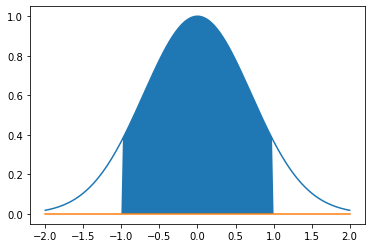

In [6]:
x = np.linspace(-2,2,200)
y = np.exp(-x**2)
# print(x)
plt.plot(x,y)
plt.plot(x,np.zeros(200))

x = np.linspace(-1,1,100)
y = np.exp(-x**2)
y[0]=0
y[np.size(y)-1]=0
plt.fill(x,y)
plt.show()

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Calculs exacts d'intégrales via les primitives</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM : "papier-crayon"</p>

+ $\displaystyle\int_1^2 xdx = \frac{3}{2}$
+ $\displaystyle\int_0^{\frac{\pi}{2}} \cos(x)dx = 1$
+ $\displaystyle\int_0^1 \frac{1}{1+x}dx = \ln(2) \simeq 0.69$
+ $\displaystyle\int_{0}^{1} x e^{-x^2}dx = \frac{1-e^{-1}}{2} \simeq 0.32$
+ $\displaystyle\int_{0}^{\sqrt{\frac{\pi}{2}}} x \cos(x^2)dx = \frac{1}{2}$
+ $\displaystyle\int_{0}^{\pi} x \cos(x) dx = \pi$
+ $\displaystyle\int_{1}^{2} \ln(x) dx = 2 \ln (2) -1$

**Remarques :** 

+ En général, la valeur exacte d'une intégrale est *inaccessible*.
+ Lorsqu'elle l'est, il faut en profiter !
+ Une valeur numérique approchée à une précision arbitraire est généralement accessible.

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Méthodes numériques</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Fonction "sur l'étagère"</p>

Calcul de l'intégrale :
$$4\int_0^1 \sqrt{1 - x^2}\,dx$$

In [2]:
# Utilisation de la fonction `quad` du module `scipy.integrate`

# quad retourne un tableau dont le premier élément contient l'intégrale.
resultat = 4*quad(lambda x : np.sqrt(1 - x ** 2),0,1)[0]

print(resultat)

3.1415926535897922


Vous pourrez utiliser cette fonction :

+ pour vérifier les résultats retournés par vos propres fonctions
+ pour les calculs de probabilités
+ dans l'application sur la transformée de Fourier

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Fonction "sur l'étagère"</p>

#### Vérification des calculs exacts

Sept intégrales sont données dans l'exercice de CM de la partie "Calcul exacts".

Vérifiez avec la fonction `quad` que ces valeurs sont les bonnes.

In [ ]:
# Insérez votre code

#### Calculs de probabilités

Dans le calcul des probabilités, la densité de la loi normale de moyenne $\mu$ et d'écart type $\sigma$ est donnée 
par :

$$ f(x) = \frac{1}{\sqrt{2 \pi}\sigma} e^{-\displaystyle\frac{1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}$$

+ Soit $X$ une variable aléatoire suivant une loi normale de moyenne $\mu = 10$ et d'écart-type $\sigma = 2$. Calculez
la probabilité :
$$ P( X \in \lbrack \mu - \sigma, \mu + \sigma \rbrack ) $$

+ Soit $X$ une variable aléatoire suivant une loi normale de moyenne $\mu = 200$ et d'écart-type $\sigma = 50$. Calculez
la probabilité :
$$ P( X \in \lbrack \mu - 2\sigma, \mu + 2\sigma \rbrack ) $$

In [ ]:
# Insérez votre code

**Appelez l'enseignant pour qu'il valide vos calculs.**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode des rectangles</p>

+ On découpe l'intervalle d'intégration $\lbrack a,b \rbrack$ en $n$ parties de même largeur $x_0=a,x_1,\ldots,x_{n-1},x_n=b$. 
+ On calcule l'aire des rectangles de côtés $\lbrack x_k,x_{k+1} \rbrack$, $\lbrack 0,f(x_k) \rbrack$. 
+ On fait la somme des aires de ces rectangles : 

$$S_n = \sum_{k=0}^{n-1} (x_{k+1} - x_k) f(x_k)$$

**Théorème :** Si $f$ est continue par morcreaux, alors lorsque $n$ tend vers l'infini, cette somme tend vers l'intégrale.

$$\int_a^b f(x)dx = \lim_{n \to +\infty} S_n$$


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM : "à la calculatrice"</p>

Calculer les premières valeurs approchées par la méthode des rectangles de l'intégrale :

$$ \int_{-1}^{1} e^{-x^2}\,dx $$

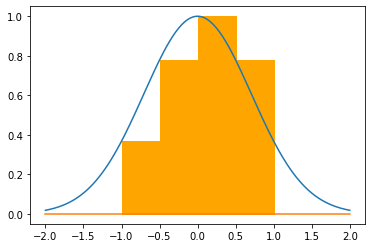

In [3]:
x = np.linspace(-2,2,200)
y = np.exp(-x**2)
plt.plot(x,y)
plt.plot(x,np.zeros(200))

x = np.array([-1,-0.5,0,0.5,1])
y = np.exp(-x**2)
for k in range(4):
    plt.fill([x[k],x[k],x[k+1],x[k+1]],[0,y[k],y[k],0],color = 'orange')
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Méthode des rectangles</p>

+ Implémentez une fonction `rect(f,a,b,n)` qui retourne la somme :
$$\sum_{k=0}^{n-1} (x_{k+1} - x_k) f(x_k)$$
où les $(x_k)_{1\leq k \leq n}$ sont équirépartis dans l'intervalle $\lbrack a,b\rbrack$.
+ Testez votre fonction avec les exemples précédents et comparez avec comparez avec la fonction `quad`

In [1]:
# Insérez votre code ici

**Déposez votre fonction `rect(f,a,b,n)` sur Moodle avant la fin de la semaine**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode des trapèzes</p>

C'est comme les rectangles $\ldots$ mais on fait des trapèzes !

S'il n'y a qu'un seul rectangle pour tout l'intervalle $\lbrack a,b \rbrack$ pour la fonction $f$ alors son aire est :

$$\frac{(b-a)(f(a) + f(b))}{2}$$

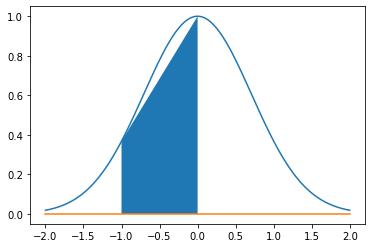

In [4]:
x = np.linspace(-2,2,200)
y = np.exp(-x**2)

plt.plot(x,y)
plt.plot(x,np.zeros(200))

x = [-1,-1,0,0]
y = [0,np.exp(-(-1)**2),np.exp(-(0)**2),0]
plt.fill(x,y)
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Méthode des trapèzes</p>

+ Comme pour les rectangles, implémentez une fonction `trap(f,a,b,n)`
+ Comparez cette méthode à la précédente en faisant varier le pas.
+ Testez votre fonction avec les exemples précédents et comparez avec comparez avec la fonction `quad`

In [ ]:
# Insérez votre code

**Déposez votre fonction `trap(f,a,b,n)` sur Moodle avant la fin de la semaine**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

+ La méthode des rectangles consiste à approximer la fonction à intéger par une fonction constante.
De plus, l'approximation est obtenue par une interpolation "au point de départ $a$".
C'est à dire que $x \mapsto f(x)$ est remplacée par $x \mapsto f(a)$.

+ La méthode des trapèzes consiste à approximer la fonction à intéger par une fonction affine.
De plus, l'approximation affine est obtenue par une interpolation "aux extrémités $a$ et $b$".
C'est à dire que $x \mapsto f(x)$ est remplacée par la droite joignant les points $(a,f(a))$ et $(b,f(b))$.

+ La méthode de Simpson consiste à approximer la fonction à intégrer par une parabole.
De plus, la parabole est obtenue par une interpolation aux points $a$, $b$ et $\frac{a+b}{2}$.
C'est à dire que $x \mapsto f(x)$ est remplacée par la parabole interpolant les points $(a,f(a))$, $(\frac{a+b}{2},f(\frac{a+b}{2}))$ et $(b,f(b))$.

Implémentez la méthode de Simpson et comparez aux précédentes.

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Méthode de Monte-Carlo</p>

+ L'intégrale permet de calculer la moyenne d'une fonction sur un intervalle. 
+ Inversement, pour calculer une intégrale, il suffit de faire la moyenne des valeurs prises par la fonction.
+ Ce n'est pas très efficace, mais ça fonctionne.

La méthode de Monte-Carlo consiste à prendre $n$ valeurs aléatoires uniformément réparties $x_1,\ldots,x_n$ dans l'intervalle $\lbrack a,b \rbrack$ et à approximer l'intégrale de $f$ entre $a$ et $b$ par :

$$ \frac{1}{b-a}\int_a^b f(x) dx \simeq \frac{1}{n} \sum_{k=1}^n f(x_k) $$

**Remarques :**

+ Le théorème de convergence de cette méthode dépasse le cadre de ce cours (il s'agit essentiellement de la loi des grands nombres)
+ La méthode de Monte-Carlo est bien plus générale que le calcul d'intégrales. Elle est très présente en apprentissage automatique.
+ La "philosophie Monte-Carlo" consiste à répéter un grand nombre de fois une opération simple.

In [6]:
# Exemple d'utilisation de random

x = np.random.random(5)

print(x)

[0.6573301  0.40110871 0.26537501 0.3285386  0.92557562]


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

Implémentez une fonction `montecarlo(f,a,b,n)` qui retourne à nouveau l'intégrale de $f$ entre $a$ et $b$, calculée à partir de la moyenne de $n$ valeurs aléatoires prises par $f$ dans l'intervalle $\lbrack a,b \rbrack$.

In [2]:
# Insérez votre code ici

**Déposez votre fonction `montecarlo(f,a,b,n)` sur Moodle avant la fin de la semaine**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

+ Pour chacune des trois méthodes d'intégration, déterminez empiriquement la valeur de $n$ donnant le résultat avec une précision de cinq chiffres.
+ Comparez les temps de calcul
+ Reprenez le code d'une de vos fonctions d'intégration et modifiez-le de manière à avoir deux versions : l'une faisant tous les calculs avec `numpy`, l'autre n'utilisant pas `numpy`.
+ Comparez les temps de calcul

In [3]:
# Outils pour le TP
# Détermination du temps de calcul
# Calcul vectoriel

N = 1000000 # Ajoutez des 0 et méditez !
tps = time.clock()
som = 0
for i in range(N):
    som += i
tps = time.clock() - tps
print("Résultat : " + str(som) + ", Temps : " + str(tps))

tps = time.clock()
som = np.sum(np.arange(N))
tps = time.clock() - tps
print("Résultat : " + str(som) + ", Temps : " + str(tps))

Résultat : 499999500000, Temps : 0.099051
Résultat : 499999500000, Temps : 0.002677999999999958


In [4]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

On considère la fonction $f(x) = \sqrt{1-x^2}$

+ Tracez cette fonction sur l'intervalle $\lbrack 0,1 \rbrack$.
+ De manière aléatoire, piochez un grand nombre de points de coordonnées $(x;y)$ dans le carré $\lbrack 0,1\rbrack^2$.
+ Sur la figure précédente, lorsqu'un point est sous la courbe affichez-le en rouge, s'il est au-dessus affichez-le en noir.
+ Calculez la proportion de points rouges. Multipliez-la par quatre (ça ne s'invente pas ! faites confiance à l'énoncé)
+ Calculez l'intégrale $4\int_0^1 \sqrt{1-x^2}dx$. Hé hé !
+ <a href="https://youtu.be/JYqjcHYTQgQ">Expliquez</a> :-)

In [3]:
# Insérez votre code ici

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Introduction à la transformée de Fourier</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Idées directrices</p>

+ Approximer des fonctions périodiques à l'aide des fonctions trigonométriques
+ Représenter des signaux en machine

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Exemple</p>

Nous allons étudier une superposition de signaux sinusoïdaux

$$f(x) = 2 \sin(x) + 3 \sin (2x) + 5 \sin (4x)$$

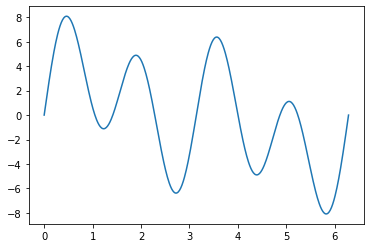

In [13]:
def f(x):
    return 2*np.sin(x) + 3*np.sin(2*x) + 5*np.sin(4*x)

x = np.linspace(0,2*math.pi,500)

plt.plot(x,f(x))
plt.show()

Lorsque l'on considère des fonctions "à base de sinus" :

+ Le signal précédent peut être représenté de la manière suivante : (Freq 4, Ampli 5), (Freq 2, Ampli 3), (Freq 1, Ampli 2). La transformée de Fourier permet d'obtenir cette représentation à partir de la fonction via un calcul d'intégrales :

$$ \hbox{Ampli} = \frac{1}{\pi} \int_0^{2\pi} f(x) \sin( \hbox{Freq}\, x) dx$$

La formule précédente n'est valable que sous certaines hypothèses, en particulier la fonction doit être $2\pi$-périodique.

+ Cette représentation (Freq, Ampli) permet de lisser un bruit éventuel et de tronquer les hautes fréquences. C'est la base de la compression MP3.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM</p>

Calculer à la main quelques amplitudes pour l'exemple précédent.

In [10]:
# Exemple

def b(n,f):
    return 1/math.pi*quad(lambda x:f(x)*math.sin(n*x),0,2*math.pi)[0]

print(b(4,f))

5.000000000000001


[4, 6, 8, 4, 4, 6, 10, 3, 3, 1]
[3, 5, 8, 3, 8, 4, 8, 3, 10, 8]


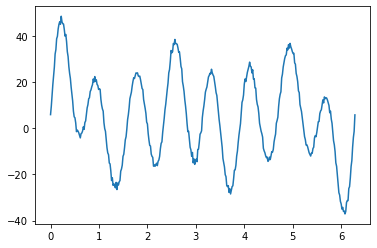

In [11]:
"""
A CONSERVER
Génération d'un signal bruité
"""

# Variables globales
N = 10
Ampli = [random.randint(1,N) for i in range(N)]
Freq = [random.randint(1,N) for i in range(N)]
print(Ampli)
print(Freq)

def signal_bruit(x):
    return numpy.sum([Ampli[i]*numpy.sin(Freq[i]*x) + random.random() for i in range(N)])

X = numpy.linspace(0,2*math.pi,400)
plt.plot(X,[signal_bruit(x) for x in X])
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

Sachant que les fréquences sont limitées à N :

+ Décomposez le signal bruité en (Freq, Ampli)
+ Reconstruisez-le (sans le bruit)
+ Coupez les fréquences supérieures à N/2.
+ Représentez le tout sur un même graphique

In [4]:
# Insérez votre code ici

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Pour le TP03, pendant la séance, vous avez $3$ exercices à montrer : usage de la fonction `quad`, graphique du quart de cercle, graphique de Fourier.
+ Pour le TP03, avant la fin de semaine, vous avez $3$ fonctions à déposer : `rect(f,a,b,n)`, `trap(f,a,b,n)`, `montecarlo(f,a,b,n)`.
+ Lors de l'évaluation sur feuille, il vous sera demandé de calculer "à la main", quelques intégrales de manière exacte puis quelques valeurs approchées à l'aide des méthodes précédentes.